## Topic: online shopping
#### Methodology
- **Population of Interest:** Ironhack students (hypothetical)
- **Sampling Method:** Convenience sampling (simulated)
- **Data Collection:** Generated 7 synthetic personas representing potential Ironhack student profiles to explore sampling concepts and analysis techniques
- **Sample Size:** 7 participants
- **Research Question:** "Does income level affect online shopping spending habits?"

In [5]:
#  Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_iris, fetch_california_housing
from statsmodels.stats.weightstats import DescrStatsW

# Set plot styling
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")

In [6]:
# read csv

shopping = pd.read_csv("shopping.csv")
shopping

,Timestamp,First name,Age,"Annual Income (in euros, approximate)",Q1. Online orders in the past 30 days,Q2. Approx. total online spend in the past 30 days,Q3. What categories did you buy? (check all that apply),Q4. Which device do you use most to shop online?,Q5. What usually triggers a purchase? (choose one),Q6. How important is delivery speed when choosing a retailer?
0,10/2/2025 11:17:23,Marta,29,"25,000",1-2,€51-150,"[1] Food/Groceries, [4] Learning (books/course...",[2] Laptop/Desktop,[1] I needed it,[3] Moderately important
1,10/2/2025 11:18:07,Jonas,34,"60,000",3-5,€151-300,"[1] Food/Groceries, [2] Apparel/Accessories, [...",[1] Phone,[1] I needed it,[5] Extremely important
2,10/2/2025 11:19:54,Aisha,26,"45,000",6-10,€300+,"[2] Apparel/Accessories, [3] Electronics/Hardware",[1] Phone,[2] I saw a sale/discount,[4] Very important
3,10/2/2025 11:20:32,Levi,31,"50,000",3-5,€151-300,"[1] Food/Groceries, [5] Household/Appliances/C...",[2] Laptop/Desktop,[1] I needed it,[4] Very important
4,10/2/2025 11:21:22,Petra,22,"15,000",1-2,€51-150,"[1] Food/Groceries, [2] Apparel/Accessories",[1] Phone,[4] Boredom/impulse,[2] Slightly important
5,10/2/2025 11:22:05,Carlos,37,"55,000",1-2,€51-150,"[3] Electronics/Hardware, [4] Learning (books/...",[2] Laptop/Desktop,[2] I saw a sale/discount,[3] Moderately important
6,10/2/2025 11:22:51,Sara,28,"30,000",1-2,€1-50,"[2] Apparel/Accessories, [4] Learning (books/c...",[2] Laptop/Desktop,[2] I saw a sale/discount,[3] Moderately important


### EDA

In [7]:
shopping.rename(columns={
    "First name": "first_name",
    "Annual Income (in euros, approximate)": "income",
    "Q1. Online orders in the past 30 days": "orders_30d",
    "Q2. Approx. total online spend in the past 30 days": "spend_30d",
    "Q3. What categories did you buy? (check all that apply)": "purchase_categories",
    "Q4. Which device do you use most to shop online?": "device_used",
    "Q5. What usually triggers a purchase? (choose one)": "purchase_trigger",
    "Q6. How important is delivery speed when choosing a retailer?": "delivery_speed"
}, inplace=True)

shopping

,Timestamp,first_name,Age,income,orders_30d,spend_30d,purchase_categories,device_used,purchase_trigger,delivery_speed
0,10/2/2025 11:17:23,Marta,29,"25,000",1-2,€51-150,"[1] Food/Groceries, [4] Learning (books/course...",[2] Laptop/Desktop,[1] I needed it,[3] Moderately important
1,10/2/2025 11:18:07,Jonas,34,"60,000",3-5,€151-300,"[1] Food/Groceries, [2] Apparel/Accessories, [...",[1] Phone,[1] I needed it,[5] Extremely important
2,10/2/2025 11:19:54,Aisha,26,"45,000",6-10,€300+,"[2] Apparel/Accessories, [3] Electronics/Hardware",[1] Phone,[2] I saw a sale/discount,[4] Very important
3,10/2/2025 11:20:32,Levi,31,"50,000",3-5,€151-300,"[1] Food/Groceries, [5] Household/Appliances/C...",[2] Laptop/Desktop,[1] I needed it,[4] Very important
4,10/2/2025 11:21:22,Petra,22,"15,000",1-2,€51-150,"[1] Food/Groceries, [2] Apparel/Accessories",[1] Phone,[4] Boredom/impulse,[2] Slightly important
5,10/2/2025 11:22:05,Carlos,37,"55,000",1-2,€51-150,"[3] Electronics/Hardware, [4] Learning (books/...",[2] Laptop/Desktop,[2] I saw a sale/discount,[3] Moderately important
6,10/2/2025 11:22:51,Sara,28,"30,000",1-2,€1-50,"[2] Apparel/Accessories, [4] Learning (books/c...",[2] Laptop/Desktop,[2] I saw a sale/discount,[3] Moderately important


In [8]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            7 non-null      object
 1   first_name           7 non-null      object
 2   Age                  7 non-null      int64 
 3   income               7 non-null      object
 4   orders_30d           7 non-null      object
 5   spend_30d            7 non-null      object
 6   purchase_categories  7 non-null      object
 7   device_used          7 non-null      object
 8   purchase_trigger     7 non-null      object
 9   delivery_speed       7 non-null      object
dtypes: int64(1), object(9)
memory usage: 692.0+ bytes


In [9]:
shopping = shopping.copy()

In [10]:
shopping

,Timestamp,first_name,Age,income,orders_30d,spend_30d,purchase_categories,device_used,purchase_trigger,delivery_speed
0,10/2/2025 11:17:23,Marta,29,"25,000",1-2,€51-150,"[1] Food/Groceries, [4] Learning (books/course...",[2] Laptop/Desktop,[1] I needed it,[3] Moderately important
1,10/2/2025 11:18:07,Jonas,34,"60,000",3-5,€151-300,"[1] Food/Groceries, [2] Apparel/Accessories, [...",[1] Phone,[1] I needed it,[5] Extremely important
2,10/2/2025 11:19:54,Aisha,26,"45,000",6-10,€300+,"[2] Apparel/Accessories, [3] Electronics/Hardware",[1] Phone,[2] I saw a sale/discount,[4] Very important
3,10/2/2025 11:20:32,Levi,31,"50,000",3-5,€151-300,"[1] Food/Groceries, [5] Household/Appliances/C...",[2] Laptop/Desktop,[1] I needed it,[4] Very important
4,10/2/2025 11:21:22,Petra,22,"15,000",1-2,€51-150,"[1] Food/Groceries, [2] Apparel/Accessories",[1] Phone,[4] Boredom/impulse,[2] Slightly important
5,10/2/2025 11:22:05,Carlos,37,"55,000",1-2,€51-150,"[3] Electronics/Hardware, [4] Learning (books/...",[2] Laptop/Desktop,[2] I saw a sale/discount,[3] Moderately important
6,10/2/2025 11:22:51,Sara,28,"30,000",1-2,€1-50,"[2] Apparel/Accessories, [4] Learning (books/c...",[2] Laptop/Desktop,[2] I saw a sale/discount,[3] Moderately important


In [11]:
shopping['purchase_categories'] = (
    shopping['purchase_categories']
    .astype(str)
    .str.replace(r'\[\d+\]\s*', '', regex=True)
    .str.strip()
)
shopping['device_used'] = (
    shopping['device_used']
    .astype(str)
    .str.replace(r'\[\d+\]\s*', '', regex=True)
    .str.strip()
)
shopping['purchase_trigger'] = (
    shopping['purchase_trigger']
    .astype(str)
    .str.replace(r'\[\d+\]\s*', '', regex=True)
    .str.strip()
)
shopping['delivery_speed'] = (
    shopping['delivery_speed']
    .astype(str)
    .str.replace(r'\[\d+\]\s*', '', regex=True)
    .str.strip()
)

In [12]:
shopping

,Timestamp,first_name,Age,income,orders_30d,spend_30d,purchase_categories,device_used,purchase_trigger,delivery_speed
0,10/2/2025 11:17:23,Marta,29,"25,000",1-2,€51-150,"Food/Groceries, Learning (books/courses/softwa...",Laptop/Desktop,I needed it,Moderately important
1,10/2/2025 11:18:07,Jonas,34,"60,000",3-5,€151-300,"Food/Groceries, Apparel/Accessories, Household...",Phone,I needed it,Extremely important
2,10/2/2025 11:19:54,Aisha,26,"45,000",6-10,€300+,"Apparel/Accessories, Electronics/Hardware",Phone,I saw a sale/discount,Very important
3,10/2/2025 11:20:32,Levi,31,"50,000",3-5,€151-300,"Food/Groceries, Household/Appliances/Cleaning",Laptop/Desktop,I needed it,Very important
4,10/2/2025 11:21:22,Petra,22,"15,000",1-2,€51-150,"Food/Groceries, Apparel/Accessories",Phone,Boredom/impulse,Slightly important
5,10/2/2025 11:22:05,Carlos,37,"55,000",1-2,€51-150,"Electronics/Hardware, Learning (books/courses/...",Laptop/Desktop,I saw a sale/discount,Moderately important
6,10/2/2025 11:22:51,Sara,28,"30,000",1-2,€1-50,"Apparel/Accessories, Learning (books/courses/s...",Laptop/Desktop,I saw a sale/discount,Moderately important


In [13]:
# remove commas from income
shopping['income'] = (
    shopping['income']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .astype(int)
)

# strip euro symbol from spend
shopping['spend_30d'] = (
    shopping['spend_30d']
    .astype(str)
    .str.replace('€', '', regex=False) 
    .str.strip()
)


In [14]:
# turn income into interger
shopping['income'] = shopping['income'].astype(int)

In [15]:
shopping.info() # check dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            7 non-null      object
 1   first_name           7 non-null      object
 2   Age                  7 non-null      int64 
 3   income               7 non-null      int64 
 4   orders_30d           7 non-null      object
 5   spend_30d            7 non-null      object
 6   purchase_categories  7 non-null      object
 7   device_used          7 non-null      object
 8   purchase_trigger     7 non-null      object
 9   delivery_speed       7 non-null      object
dtypes: int64(2), object(8)
memory usage: 692.0+ bytes


In [16]:
# now we neeed to turn spending ranges into categories
# we'll use the midpoint of each range, which will allow us to do correlational analysis
# (low + high) / 2


def convert_spend_to_numeric(dollas):
    dollas = dollas.strip().replace('+', "") # first clean the data 
    if '-' in dollas:
        split_numbers = dollas.split('-') 
        low = int(split_numbers[0]) 
        high = int(split_numbers[1])
        return (low + high) / 2 # then divide
    else:
        return int(dollas)


In [17]:
# apply the function to the data frame
shopping["spend_numeric"] = shopping["spend_30d"].apply(convert_spend_to_numeric)
shopping["spend_numeric"]

0    100.5
1    225.5
2    300.0
3    225.5
4    100.5
5    100.5
6     25.5
Name: spend_numeric, dtype: float64

In [18]:
shopping[['first_name', 'income', 'spend_30d', 'spend_numeric']]

,first_name,income,spend_30d,spend_numeric
0,Marta,25000,51-150,100.5
1,Jonas,60000,151-300,225.5
2,Aisha,45000,300+,300.0
3,Levi,50000,151-300,225.5
4,Petra,15000,51-150,100.5
5,Carlos,55000,51-150,100.5
6,Sara,30000,1-50,25.5


In [19]:
shopping["income"].describe().round(2)

count        7.00
mean     40000.00
std      16832.51
min      15000.00
25%      27500.00
50%      45000.00
75%      52500.00
max      60000.00
Name: income, dtype: float64

In [20]:
shopping["spend_numeric"].describe().round()

count      7.0
mean     154.0
std       97.0
min       26.0
25%      100.0
50%      100.0
75%      226.0
max      300.0
Name: spend_numeric, dtype: float64

Text(0, 0.5, 'Amount Spent, Past 30 Days')

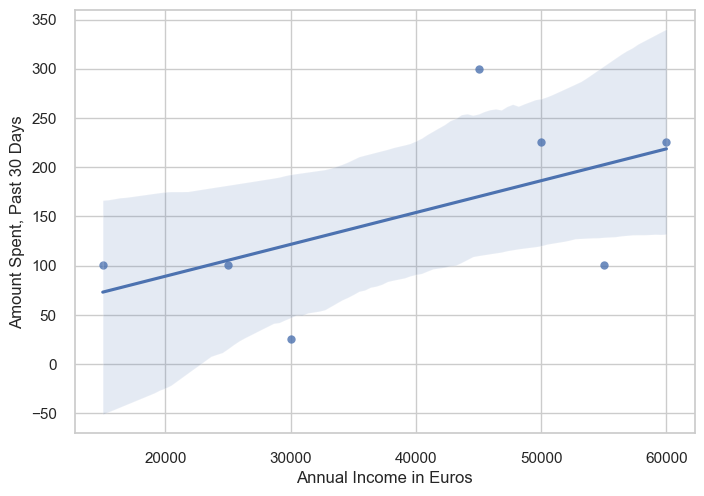

In [22]:
sns.regplot(data=shopping,
                x="income",
                y="spend_numeric")
plt.xlabel("Annual Income in Euros")
plt.ylabel("Amount Spent, Past 30 Days")
